# FINAL PROJECT DELIVERABLE  

I have decided to do some major changes to how I am going to approach this Query Machine.

the dataset that I have created in the initial D2 contains global indexes of living indecators for alot of countries (about 150 countries), after rethinking i have taken two choices on how to deal with this dataset. These changes are:

1- decrease the number of countries majorly (to ~50 countries), this is because most countries that exist within the same region have very similar metrics, this will make the classification task very hard and cause potential overfittiing for the data, which will even produce intersecting clusters. the countries will be chosen stratigically so that the dataset contains the hightest number of people (so i will include countries with high populations), also each region will have at least two countries (choosing qatar and KSA for example for the gulf ragion). This will ensure that the data prediction will have a higher accuracy.
    
2- use the data metrics from the chosen countires initial D2 dataset as random data generating points ( I will use each metric to be the median of a normal distribution), this will ensure to simulate a real life questionnaire data set according to the metrics that these data points were initially based on.  
    
    

## 1- D2 FINAL 

In [319]:
import pandas as pd
import matplotlib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 100
import numpy as np
import time
from sklearn import cluster
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import numpy as np

In [320]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [321]:
dg = pd.read_csv("data-source-grand1.csv")
df = pd.read_csv("data-freedom.csv")

In [322]:
#adding freedom to the dg dataset
for i in range(156):
    if(dg["Country or region"][i] in list(df['country'])):
        n = df[df["country"]==dg["Country or region"][i]].index.values
        dg["freedom"][i] = df['freedom index'][n]

<ipython-input-322-7dddb30e2af5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg["freedom"][i] = df['freedom index'][n]


In [323]:
#checking for nans
np.sum(dg.isna().sum())

10

I have decided to drop all nan data, this is because I am trying to minimize the countries included, dropping countries with nan fields will help with that

In [324]:
dg = dg.dropna(axis='columns')

In [325]:
dg

rank Country or region  Score  GDP per capita  Social support  \
0     154       Afghanistan  3.203           0.350           0.517   
1     107           Albania  4.719           0.947           0.848   
2      88           Algeria  5.211           1.002           1.160   
3      47         Argentina  6.086           1.092           1.432   
4     116           Armenia  4.559           0.850           1.055   
..    ...               ...    ...             ...             ...   
151   108         Venezuela  4.707           0.960           1.427   
152    94           Vietnam  5.175           0.741           1.346   
153   151             Yemen  3.380           0.287           1.163   
154   138            Zambia  4.107           0.578           1.058   
155   146          Zimbabwe  3.663           0.366           1.114   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.361                         0.000       0.158   
1                      0.874                         0.383       0.178   
2                      0.785                         0.086       0.073   
3                      0.881                         0.471       0.066   
4                      0.815                         0.283       0.095   
..                       ...                           ...         ...   
151                    0.805                         0.154       0.064   
152                    0.851                         0.543       0.147   
153                    0.463                         0.143       0.108   
154                    0.426                         0.431       0.247   
155                    0.433                         0.361       0.151   

     Perceptions of corruption  
0                        0.025  
1                        0.027  
2                        0.114  
3                        0.050  
4                        0.064  
..                         ...  
151                      0.047  
152                      0.073  
153                      0.077  
154                      0.087  
155                      0.089  

[156 rows x 9 columns]

for choosing the countries, I am going to keep only the top 50 countries in terms of population, this will help decrease the error and build a (somewhat) accurate model.

These countries are:
China,
India,
United States,
Indonesia,
Pakistan,
Brazil,
Nigeria,
Bangladesh,
Russia,
Mexico,
Japan,
Ethiopia,
Philippines,
Egypt,
Vietnam,
DR Congo,
Turkey,
Iran,
Germany,
Thailand,
United Kingdom,
France,
Italy,
Tanzania,
South Africa,
Myanmar,
Kenya,
South Korea,
Colombia,
Spain,
Uganda,
Argentina,
Algeria,
Sudan,
Ukraine,
Iraq,
Afghanistan,
Poland,
Canada,
Morocco,
Saudi Arabia,
Uzbekistan,
Peru,
Angola,
Malaysia,
Mozambique,
Ghana,
Yemen,
Nepal.

these countries represent 86.42% of the global world population

I will drop all countries that are not in the list of the top 50 in population

In [326]:
#dataset with top 50 countries in terms of population (Qatar is added because why not)
top50 = pd.read_csv("top50.csv")

In [327]:
top50

Country (or dependency)  Population (2020) Yearly Change  Net Change  \
0                    China       1.440298e+09         0.39%   5540090.0   
1                    India       1.382345e+09         0.99%  13586631.0   
2            United States       3.313410e+08         0.59%   1937734.0   
3                Indonesia       2.740216e+08         1.07%   2898047.0   
4                 Pakistan       2.216128e+08         2.00%   4327022.0   
5                   Brazil       2.128220e+08         0.72%   1509890.0   
6                  Nigeria       2.069843e+08         2.58%   5175990.0   
7               Bangladesh       1.649723e+08         1.01%   1643222.0   
8                   Russia       1.459455e+08         0.04%     62206.0   
9                   Mexico       1.291660e+08         1.06%   1357224.0   
10                   Japan       1.264074e+08        -0.30%   -383840.0   
11                Ethiopia       1.154344e+08         2.57%   2884858.0   
12             Philippines       1.098303e+08         1.35%   1464463.0   
13                   Egypt       1.026591e+08         1.94%   1946331.0   
14                 Vietnam       9.749001e+07         0.91%    876473.0   
15                DR Congo       9.000395e+07         3.19%   2770836.0   
16                  Turkey       8.449524e+07         1.09%    909452.0   
17                    Iran       8.417693e+07         1.30%   1079043.0   
18                 Germany       8.383097e+07         0.32%    266897.0   
19                Thailand       6.983078e+07         0.25%    174396.0   
20          United Kingdom       6.794828e+07         0.53%    355839.0   
21                  France       6.529893e+07         0.22%    143783.0   
22                   Italy       6.044604e+07        -0.15%    -88249.0   
23                Tanzania       6.001240e+07         2.98%   1728755.0   
24            South Africa       5.943672e+07         1.28%    750420.0   
25                 Myanmar       5.447325e+07         0.67%    364380.0   
26                   Kenya       5.396874e+07         2.28%   1197323.0   
27             South Korea       5.127698e+07         0.09%     43877.0   
28                Colombia       5.097625e+07         1.08%    543448.0   
29                   Spain       4.675798e+07         0.04%     18002.0   
30                  Uganda       4.597493e+07         3.32%   1471413.0   
31               Argentina       4.526745e+07         0.93%    415097.0   
32                 Algeria       4.398457e+07         1.85%    797990.0   
33                   Sudan       4.401926e+07         2.42%   1036022.0   
34                 Ukraine       4.368658e+07        -0.59%   -259876.0   
35                    Iraq       4.037277e+07         2.32%    912710.0   
36             Afghanistan       3.907428e+07         2.33%    886592.0   
37                  Poland       3.783926e+07        -0.11%    -41157.0   
38                  Canada       3.779941e+07         0.89%    331107.0   
39                 Morocco       3.698562e+07         1.20%    438791.0   
40            Saudi Arabia       3.490594e+07         1.59%    545343.0   
41              Uzbekistan       3.355182e+07         1.48%    487487.0   
42                    Peru       3.305021e+07         1.42%    461401.0   
43                  Angola       3.303208e+07         3.27%   1040977.0   
44                Malaysia       3.243696e+07         1.30%    416222.0   
45              Mozambique       3.139881e+07         2.93%    889399.0   
46                   Ghana       3.118143e+07         2.15%    655084.0   
47                   Yemen       2.993547e+07         2.28%    664042.0   
48                   Nepal       2.922520e+07         1.85%    528098.0   
49               Venezuela       2.842158e+07        -0.28%    -79889.0   
50                   Qatar       2.889284e+06         1.73%     48986.0   
51                     NaN                NaN           NaN         NaN   

    Density (P/Km²)  Land A

In [328]:
top50_countries = top50["Country (or dependency)"]

In [329]:
top50_countries = top50_countries.drop(51) #cleaning the data

In [330]:
top50_countries

0              China
1              India
2      United States
3          Indonesia
4           Pakistan
5             Brazil
6            Nigeria
7         Bangladesh
8             Russia
9             Mexico
10             Japan
11          Ethiopia
12       Philippines
13             Egypt
14           Vietnam
15          DR Congo
16            Turkey
17              Iran
18           Germany
19          Thailand
20    United Kingdom
21            France
22             Italy
23          Tanzania
24      South Africa
25           Myanmar
26             Kenya
27       South Korea
28          Colombia
29             Spain
30            Uganda
31         Argentina
32           Algeria
33             Sudan
34           Ukraine
35              Iraq
36       Afghanistan
37            Poland
38            Canada
39           Morocco
40      Saudi Arabia
41        Uzbekistan
42              Peru
43            Angola
44          Malaysia
45        Mozambique
46             Ghana
47           

In [331]:
#cleaning the dataset to inlude the top 50 in terms of population
#dg = dg.drop(6)
for i in range(len(dg["Country or region"])):
    if(dg["Country or region"][i] not in list(top50_countries)):
        dg = dg.drop(i)

In [332]:
len(dg)

48

In [333]:
dg

rank Country or region  Score  GDP per capita  Social support  \
0     154       Afghanistan  3.203           0.350           0.517   
2      88           Algeria  5.211           1.002           1.160   
3      47         Argentina  6.086           1.092           1.432   
9     125        Bangladesh  4.456           0.562           0.928   
17     32            Brazil  6.300           1.004           1.439   
23      9            Canada  7.278           1.365           1.505   
27     93             China  5.191           1.029           1.125   
28     43          Colombia  6.125           0.985           1.410   
39    137             Egypt  4.166           0.913           1.039   
42    134          Ethiopia  4.286           0.336           1.033   
44     24            France  6.592           1.324           1.472   
48     17           Germany  6.985           1.373           1.454   
49     98             Ghana  4.996           0.611           0.868   
58    140             India  4.015           0.755           0.765   
59     92         Indonesia  5.192           0.931           1.203   
60    117              Iran  4.548           1.100           0.842   
61    126              Iraq  4.437           1.043           0.980   
64     36             Italy  6.223           1.294           1.488   
67     58             Japan  5.886           1.327           1.419   
70    121             Kenya  4.509           0.512           0.983   
84     80          Malaysia  5.339           1.221           1.171   
89     23            Mexico  6.595           1.070           1.323   
93     89           Morocco  5.208           0.801           0.782   
94    123        Mozambique  4.466           0.204           0.986   
95    131           Myanmar  4.360           0.710           1.181   
97    100             Nepal  4.913           0.446           1.226   
102    85           Nigeria  5.265           0.696           1.111   
106    67          Pakistan  5.653           0.677           0.886   
110    65              Peru  5.697           0.960           1.274   
111    69       Philippines  5.631           0.807           1.293   
112    40            Poland  6.182           1.206           1.438   
114    29             Qatar  6.374           1.684           1.313   
116    68            Russia  5.648           1.183           1.452   
118    28      Saudi Arabia  6.375           1.403           1.357   
126   106      South Africa  4.722           0.960           1.351   
127    54       South Korea  5.895           1.301           1.219   
129    30             Spain  6.354           1.286           1.484   
137   153          Tanzania  3.231           0.476           0.885   
138    52          Thailand  6.008           1.050           1.409   
142    79            Turkey  5.373           1.183           1.360   
144   136            Uganda  4.189           0.332           1.069   
145   133           Ukraine  4.332           0.820           1.390   
147    15    United Kingdom  7.054           1.333           1.538   
148    19     United States  6.892           1.433           1.457   
150    41        Uzbekistan  6.174           0.745           1.529   
151   108         Venezuela  4.707           0.960           1.427   
152    94           Vietnam  5.175           0.741           1.346   
153   151             Yemen  3.380           0.287           1.163   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.361                         0.000       0.158   
2                      0.785                         0.086       0.073   
3                      0.881                         0.471       0.066   
9                      0.723                         0.527       0.166   
17                     0.802                         0.390       0.099   
23                     1.039                         0.584       0.285   
27                     0.893                         0.5

now that the dataset is finally complete, it is time to explore it and fine-tune it

from the data set, the ranking field will be dropped because it does not serve a purpose, also the data needs to be rescaled on a scale 0-10, this scale is chosen because it is common and easier for people to classify based on such scale. random data that will be normally distributed will be generated based on the indices, these will be the best in simulating an in real life questionnaire, also will be helpfull in creating a K-NN classifier for the data.

In [334]:
dg = dg.drop("rank",axis =1)
dg = dg.drop("Score",axis = 1)

In [335]:
dg = dg.drop(102) #i will remove nigeria because it overshadows other countries in the classifier

In [336]:
#exploring the data
#GPD value :
print("GPD per capita ranges from",min(dg["GDP per capita"]),"to",max(dg["GDP per capita"]))
#social support:
print("social support ranges from",min(dg["Social support"]),"to",max(dg["Social support"]))
#Healthy life expectancy:
print("Healthy life expectancy ranges from",min(dg["Healthy life expectancy"]),"to",max(dg["Healthy life expectancy"]))
#Freedom to make life choices
print("Freedom to make life choices ranges from",min(dg["Freedom to make life choices"]),"to",max(dg["Freedom to make life choices"]))
#Generosity
print("Generosity ranges from",min(dg["Generosity"]),"to",max(dg["Generosity"]))
#Perceptions of corruption
print("Perceptions of corruption ranges from",min(dg["Perceptions of corruption"]),"to",max(dg["Perceptions of corruption"]))

GPD per capita ranges from 0.204 to 1.6840000000000002
social support ranges from 0.517 to 1.538
Healthy life expectancy ranges from 0.361 to 1.088
Freedom to make life choices ranges from 0.0 to 0.631
Generosity ranges from 0.036000000000000004 to 0.5660000000000001
Perceptions of corruption ranges from 0.01 to 0.308


In [337]:
gdf = pd.DataFrame()
gdict = {"country":[],"GDP":[],"social support":[],"healthy life":[],"freedom of choice":[],"generosity":[],"corruption":[]}
for i in range(len(dg)):
    for j in range(100):
        gdict["country"] += [list(dg["Country or region"])[i]]
        gdict["GDP"] += [np.random.normal(list(dg["GDP per capita"])[i],0.1,1)]
        gdict["social support"] += [np.random.normal(list(dg["Social support"])[i],0.1,1)]
        gdict["healthy life"] += [np.random.normal(list(dg["Healthy life expectancy"])[i],0.1,1)]
        gdict["freedom of choice"] += [np.random.normal(list(dg["Freedom to make life choices"])[i],0.1,1)]
        gdict["generosity"] += [np.random.normal(list(dg["Generosity"])[i],0.1,1)]
        gdict["corruption"] += [np.random.normal(list(dg["Perceptions of corruption"])[i],0.1,1)]        

In [338]:
gdf = pd.DataFrame(gdict)

In [339]:
#correcting the values format
for i in range(len(gdf)):
    for j in range(6):
        gdf.loc[i][j+1] = gdf.loc[i][j+1][0] +1 #shifiting the data so the normal distribution wont give negative values

In [340]:
gdf.describe()

country          GDP  social support  healthy life  \
count          4700  4700.000000     4700.000000   4700.000000   
unique           47  4700.000000     4700.000000   4700.000000   
top     Afghanistan     2.108997        2.032756      1.821518   
freq            100     1.000000        1.000000      1.000000   

        freedom of choice   generosity   corruption  
count         4700.000000  4700.000000  4700.000000  
unique        4700.000000  4700.000000  4700.000000  
top              1.211364     1.178634     1.138816  
freq             1.000000     1.000000     1.000000

In [341]:
gdf

country      GDP social support healthy life freedom of choice  \
0     Afghanistan  1.20931        1.51628      1.29648          0.875401   
1     Afghanistan   1.3663        1.39174      1.42105            1.1037   
2     Afghanistan  1.25284         1.4207      1.12411          0.915968   
3     Afghanistan   1.3368        1.46077      1.42017          0.880669   
4     Afghanistan  1.40846        1.67543      1.15467          0.966314   
...           ...      ...            ...          ...               ...   
4695        Yemen  1.29286        2.31823      1.60277           1.24777   
4696        Yemen  1.18819         2.1745      1.59113           1.28013   
4697        Yemen  1.48662        2.21107      1.53325           1.02449   
4698        Yemen  1.05046        1.95267       1.6522           1.20855   
4699        Yemen  1.36519        2.06193      1.54194            1.0996   

     generosity corruption  
0       1.06945    1.05897  
1       1.15172    1.15005  
2       1.19045    1.01489  
3       1.15057    1.23561  
4       1.14254   0.981397  
...         ...        ...  
4695   0.998547    1.23397  
4696    1.15607    1.09068  
4697    1.25151    1.01585  
4698    1.06017   0.989104  
4699    1.38736    1.35701  

[4700 rows x 7 columns]

In [342]:
gdf = gdf.sample(frac = 1)

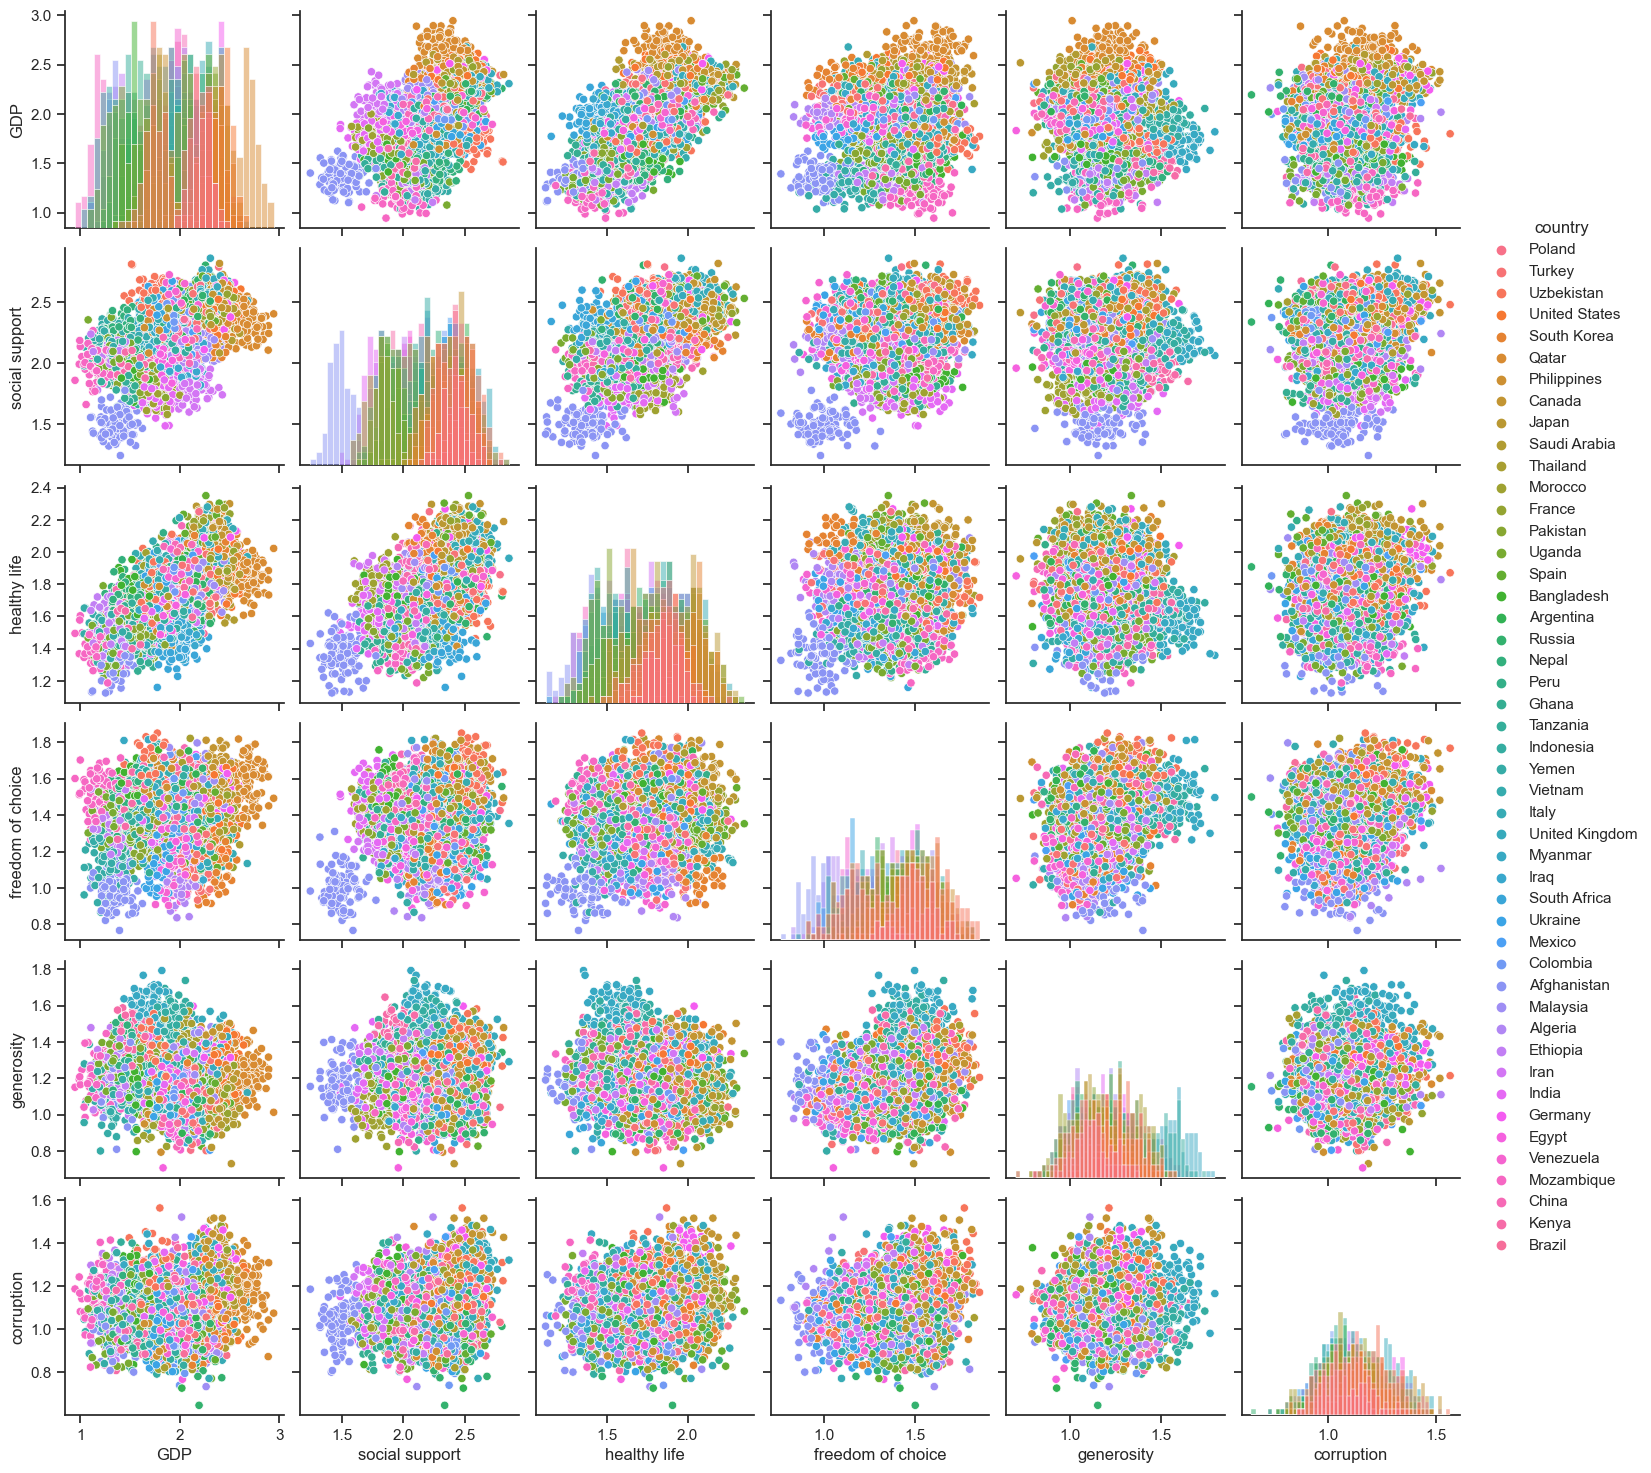

In [343]:
#creating historgrams usong seaborn
import seaborn as sb

sb.set(style="ticks", color_codes=False)

g = sb.pairplot(gdf, hue="country", diag_kind='hist')

1- GDP seems like the factor with highest correlation with all other factors

2- there seems to be a good correlation between social support and GDP, healthy life and freedom of choice.

3- freedom of choice to be sparsely distributed making it hard to create correlaion from it, it might get dropped

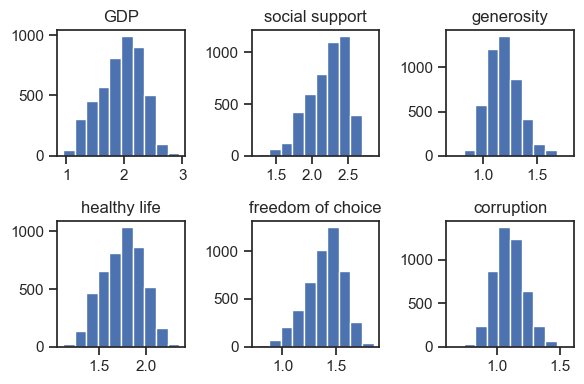

In [344]:
#creating histogram using matplotlib
fig, axs = plt.subplots(2,3)
axs[0, 0].hist(gdf["GDP"])
axs[0, 0].set_title('GDP')
axs[0, 1].hist(gdf["social support"])
axs[0, 1].set_title("social support")
axs[1, 0].hist(gdf["healthy life"])
axs[1, 0].set_title('healthy life')
axs[1, 1].hist(gdf["freedom of choice"])
axs[1, 1].set_title('freedom of choice')
axs[0, 2].hist(gdf["generosity"])
axs[0, 2].set_title('generosity')
axs[1, 2].hist(gdf["corruption"])
axs[1, 2].set_title('corruption')
fig.tight_layout()

box plots showing outliers

GPD boxplot


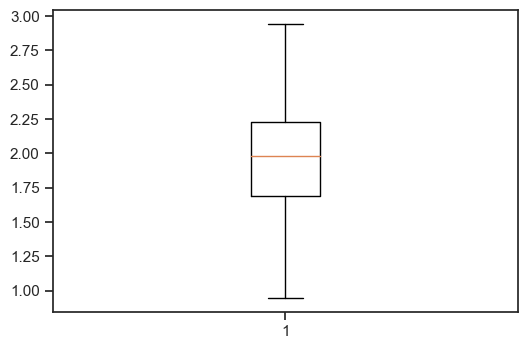

social supprt boxplot


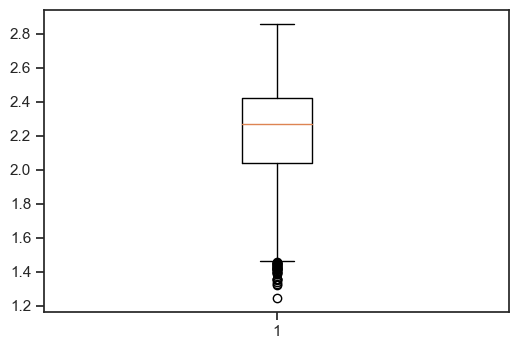

healthy life boxplot


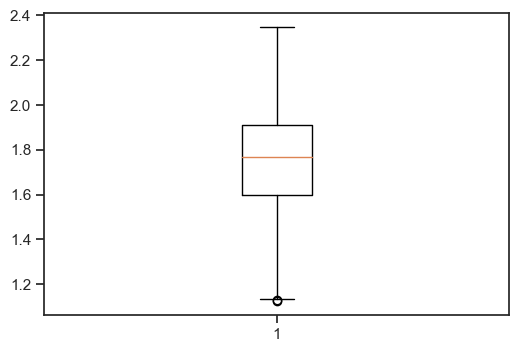

freedom of choice boxplot


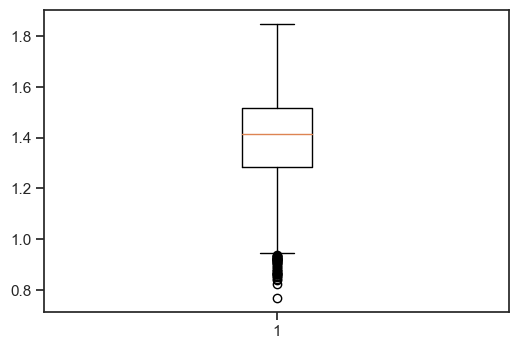

generosity boxplot


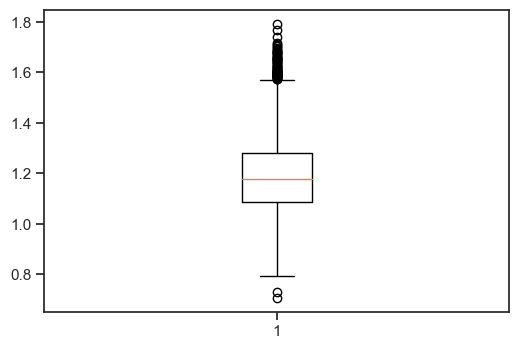

corruption boxplot


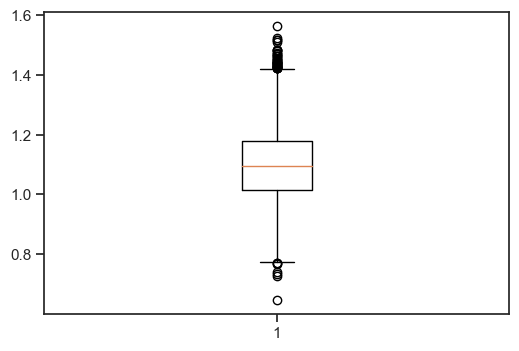

In [345]:
print("GPD boxplot")
plt.boxplot(gdf["GDP"])
plt.show()
print("social supprt boxplot")
plt.boxplot(gdf["social support"])
plt.show()
print("healthy life boxplot")
plt.boxplot(gdf["healthy life"])
plt.show()
print("freedom of choice boxplot")
plt.boxplot(gdf["freedom of choice"])
plt.show()
print("generosity boxplot")
plt.boxplot(gdf["generosity"])
plt.show()
print("corruption boxplot")
plt.boxplot(gdf["corruption"])
plt.show()

rescaling the features and preparing them for training

In [346]:
targets = gdf['country']

values = gdf.drop(['country'], axis =1)

In [347]:
#i will rescale all features to values in the range [0,1] (because it is easier for people to make a choice on that scale)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
scaled_values =min_max_scaler.fit_transform(values)
scaled_values

array([[0.59320806, 0.82556229, 0.59755884, 0.76549638, 0.44092194,
        0.42298127],
       [0.64406628, 0.64165266, 0.58161659, 0.42399931, 0.37008168,
        0.47234013],
       [0.37251983, 0.80705093, 0.4989441 , 0.79817603, 0.52436108,
        0.62444344],
       ...,
       [0.36797092, 0.78657398, 0.57168091, 0.75049705, 0.38701224,
        0.71157723],
       [0.23956897, 0.57860509, 0.30905949, 0.32337943, 0.44835665,
        0.40866989],
       [0.25135749, 0.3303742 , 0.18833216, 0.15323845, 0.50820688,
        0.34020756]])

# D3 

# trying a K-NN classifier

model number  1 - mean accuracy of model with  1  neighbour(s) and uniform  weighting is: 1.0
Mean test score of model: 0.479 (std: 0.029)
Mean train score: 1.000 (std: 0.000)
box plot of cross-validation analysis:


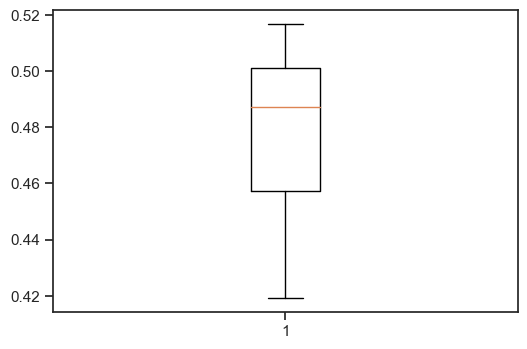

model number  2 - mean accuracy of model with  3  neighbour(s) and distance  weighting is: 1.0
Mean test score of model: 0.514 (std: 0.023)
Mean train score: 1.000 (std: 0.000)
box plot of cross-validation analysis:


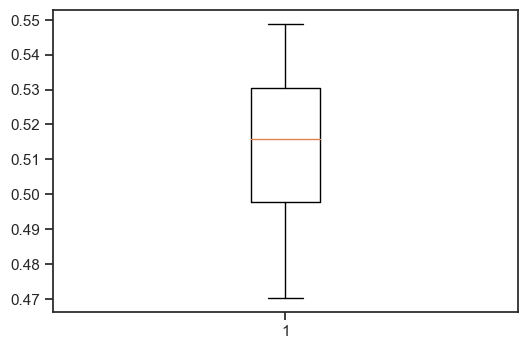

model number  3 - mean accuracy of model with  4  neighbour(s) and uniform  weighting is: 0.694468085106383
Mean test score of model: 0.515 (std: 0.014)
Mean train score: 0.692 (std: 0.005)
box plot of cross-validation analysis:


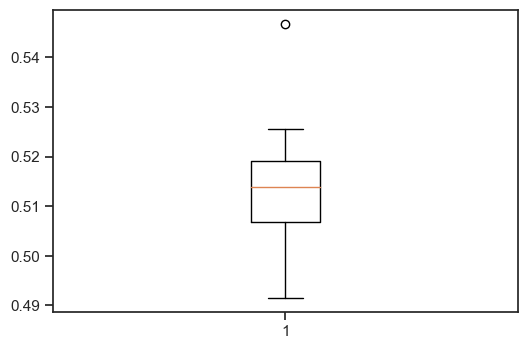

model number  4 - mean accuracy of model with  10  neighbour(s) and distance  weighting is: 1.0
Mean test score of model: 0.561 (std: 0.022)
Mean train score: 1.000 (std: 0.000)
box plot of cross-validation analysis:


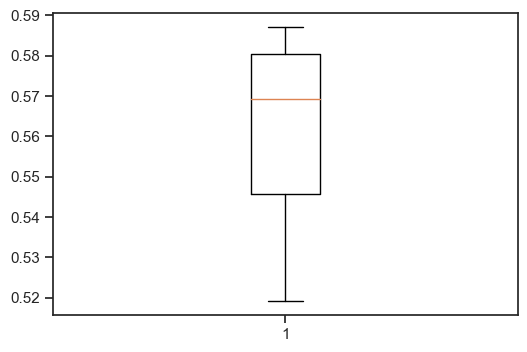

model number  5 - mean accuracy of model with  20  neighbour(s) and uniform  weighting is: 0.6317021276595745
Mean test score of model: 0.575 (std: 0.024)
Mean train score: 0.632 (std: 0.003)
box plot of cross-validation analysis:


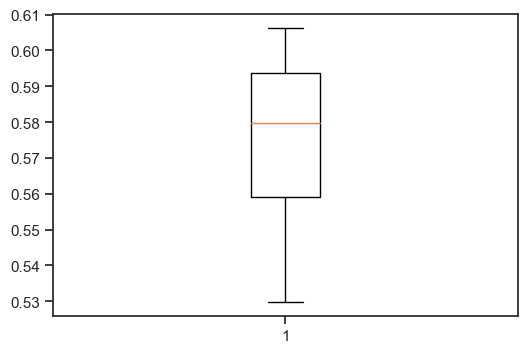

model number  6 - mean accuracy of model with  30  neighbour(s) and distance  weighting is: 1.0
Mean test score of model: 0.584 (std: 0.028)
Mean train score: 1.000 (std: 0.000)
box plot of cross-validation analysis:


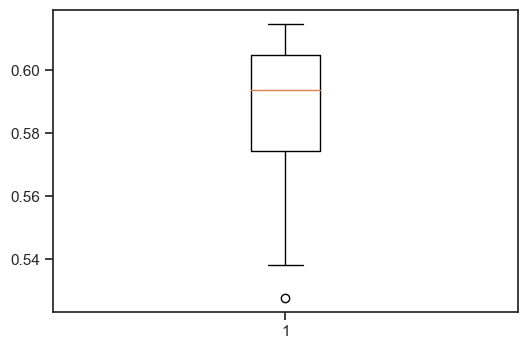

model number  7 - mean accuracy of model with  100  neighbour(s) and uniform  weighting is: 0.6134042553191489
Mean test score of model: 0.590 (std: 0.023)
Mean train score: 0.608 (std: 0.003)
box plot of cross-validation analysis:


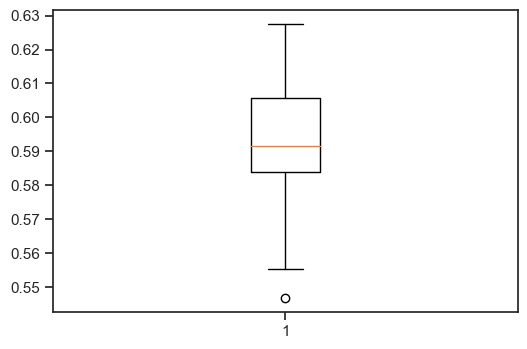

model number  8 - mean accuracy of model with  150  neighbour(s) and uniform  weighting is: 0.6061702127659574
Mean test score of model: 0.588 (std: 0.025)
Mean train score: 0.603 (std: 0.003)
box plot of cross-validation analysis:


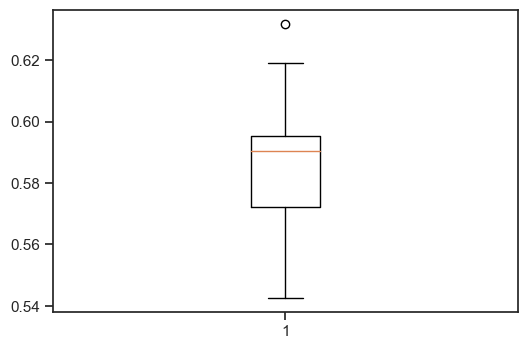

model number  9 - mean accuracy of model with  200  neighbour(s) and uniform  weighting is: 0.601063829787234
Mean test score of model: 0.586 (std: 0.022)
Mean train score: 0.595 (std: 0.004)
box plot of cross-validation analysis:


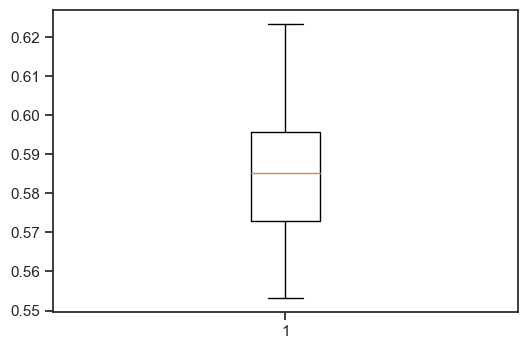

model number  10 - mean accuracy of model with  7  neighbour(s) and distance  weighting is: 1.0
Mean test score of model: 0.557 (std: 0.022)
Mean train score: 1.000 (std: 0.000)
box plot of cross-validation analysis:


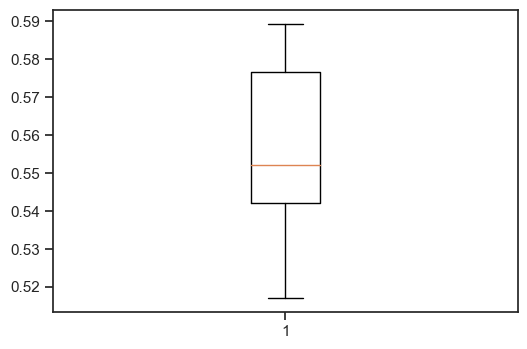

model number  11 - mean accuracy of model with  66  neighbour(s) and uniform  weighting is: 0.6189361702127659
Mean test score of model: 0.594 (std: 0.023)
Mean train score: 0.616 (std: 0.003)
box plot of cross-validation analysis:


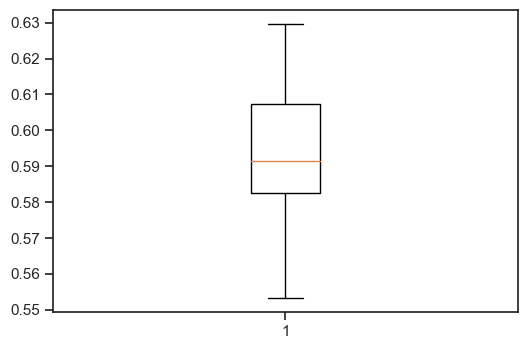

model number  12 - mean accuracy of model with  11  neighbour(s) and distance  weighting is: 1.0
Mean test score of model: 0.569 (std: 0.027)
Mean train score: 1.000 (std: 0.000)
box plot of cross-validation analysis:


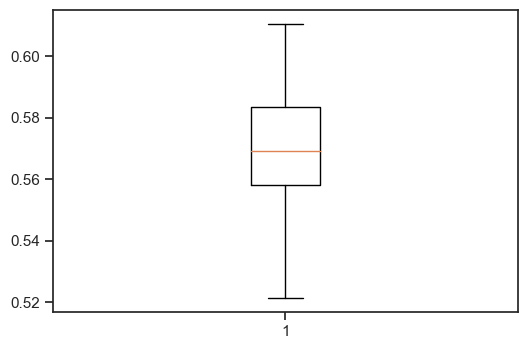

model number  13 - mean accuracy of model with  6  neighbour(s) and uniform  weighting is: 0.6680851063829787
Mean test score of model: 0.539 (std: 0.020)
Mean train score: 0.667 (std: 0.003)
box plot of cross-validation analysis:


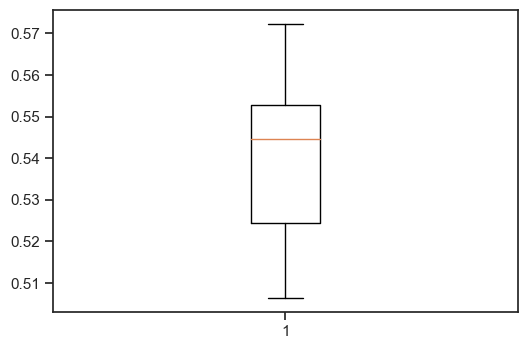

model number  14 - mean accuracy of model with  43  neighbour(s) and distance  weighting is: 1.0
Mean test score of model: 0.588 (std: 0.024)
Mean train score: 1.000 (std: 0.000)
box plot of cross-validation analysis:


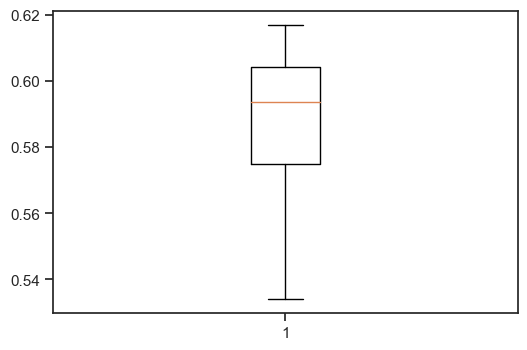

model number  15 - mean accuracy of model with  10  neighbour(s) and uniform  weighting is: 0.6508510638297872
Mean test score of model: 0.561 (std: 0.020)
Mean train score: 0.650 (std: 0.004)
box plot of cross-validation analysis:


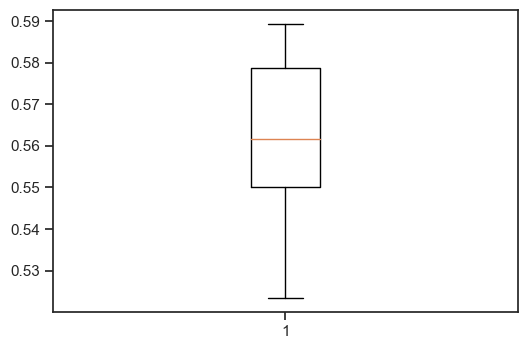

model number  16 - mean accuracy of model with  15  neighbour(s) and uniform  weighting is: 0.6393617021276595
Mean test score of model: 0.571 (std: 0.017)
Mean train score: 0.638 (std: 0.004)
box plot of cross-validation analysis:


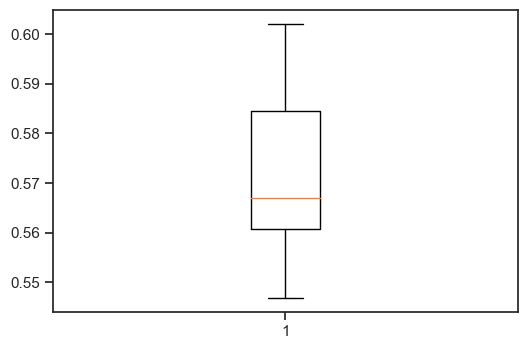

In [348]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
counter = 0
for i in [(1,'uniform'),(3,'distance'),(4,'uniform'),(10,'distance'),(20,'uniform'),(30,'distance'),(100,'uniform'),(150,'uniform'),(200,'uniform'),(7,'distance'),(66,'uniform'),(11,'distance'),(6,'uniform'),(43,'distance'),(10,'uniform'),(15,'uniform')]:
    counter += 1
    neighbors_num = i[0]
    weights = i[1]
    classifier = KNeighborsClassifier(n_neighbors=neighbors_num, weights=weights)
    classifier.fit(scaled_values, targets)
    prediction = classifier.predict(scaled_values)
    mean_accuracy = np.mean(prediction == targets)
    print("model number ",counter,"- mean accuracy of model with ",i[0], " neighbour(s) and",i[1]," weighting is:",  mean_accuracy)
    ####
    cv_results = cross_validate(classifier, scaled_values, targets, cv=10, 
                            return_train_score=True)

    print('Mean test score of model: {:.3f} (std: {:.3f})'
          '\nMean train score: {:.3f} (std: {:.3f})'.format(
                                                  np.mean(cv_results['test_score']),
                                                  np.std(cv_results['test_score']),
                                                  np.mean(cv_results['train_score']),
                                                  np.std(cv_results['train_score'])))
    ####
    
   
    print("box plot of cross-validation analysis:")
    plt.boxplot(cv_results['test_score'])
    plt.show()

In [349]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 

def learn_kNN_classifier(features_data, targets, neighbors, voting):
    '''Set up a K-NN classifier and fits it to the given training data.
       Return: learned classifier.''' 
    
    classifier = KNeighborsClassifier(n_neighbors=neighbors, 
                                      weights=voting)
    classifier.fit(features_data, targets)
    
    return classifier


def get_predictions(test_data, targets, classifier):
    '''Input: trained classifier, test set for feature data paired with target values.
       Return: prediction labels and the mean accuracy over the test set.'''
    
    Y_prediction = classifier.predict(test_data)
    
    accuracy = metrics.accuracy_score(targets, Y_prediction)
    
    return (prediction, accuracy)

In [350]:
 classi = learn_kNN_classifier(scaled_values, targets, 10, 'uniform')

In [351]:
countries =  dg['Country or region']
countries =  list(countries)

# clustering

In [352]:
data_train, data_test, labels_train, labeles_test =  train_test_split( values, targets,train_size= 0.8, shuffle=True)
labels_train = np.array(labels_train).reshape((-1,1))

In [353]:
from sklearn.cluster import KMeans

n_clusters = 47
kmeans = KMeans(n_clusters=n_clusters)

kmeans.fit(scaled_values)

labels = np.array(countries)

centers = kmeans.cluster_centers_

centers_labels = kmeans.predict(centers)

In [354]:
print(labels)

['Afghanistan' 'Algeria' 'Argentina' 'Bangladesh' 'Brazil' 'Canada'
 'China' 'Colombia' 'Egypt' 'Ethiopia' 'France' 'Germany' 'Ghana' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Italy' 'Japan' 'Kenya' 'Malaysia' 'Mexico'
 'Morocco' 'Mozambique' 'Myanmar' 'Nepal' 'Pakistan' 'Peru' 'Philippines'
 'Poland' 'Qatar' 'Russia' 'Saudi Arabia' 'South Africa' 'South Korea'
 'Spain' 'Tanzania' 'Thailand' 'Turkey' 'Uganda' 'Ukraine'
 'United Kingdom' 'United States' 'Uzbekistan' 'Venezuela' 'Vietnam'
 'Yemen']


In [355]:
print(centers_labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]


In [356]:
kmeans.predict(data_train)

array([45, 45, 45, ..., 45, 45, 45])

# MLP 

In [357]:
y
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = gdf['country'].values
transfomed_label = encoder.fit_transform(y)
print(y)
print(max(transfomed_label))


['Poland' 'Turkey' 'Uzbekistan' ... 'Vietnam' 'Yemen' 'Afghanistan']
46


In [358]:

from sklearn.model_selection import train_test_split
x_data = gdf.drop(['country'], axis =1)
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x_train, x_test, y_train, y_test = train_test_split(scaled_values, transfomed_label,test_size = 0.35,random_state=1)


In [359]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
clf = MLPClassifier(random_state=1, max_iter=10000).fit(scaled_values, transfomed_label)
mlp_prediction = clf.predict[]

In [360]:
clf.score(x_test, y_test)

0.6462006079027356

In [361]:
y[clf.predict([x_test[5]])]

array(['Uzbekistan'], dtype=object)

I will be using the MLP as the final classifier as it is highly dimensional and it also provided the highest accuracy (64%)

# random forest

In [362]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)
prediction_rf=rf.predict(x_test)

In [363]:
rf.predict([[0.5,0.2,0.4,0.6,0.2,0.5]])

array([13])

In [364]:
x_test[2]

array([0.7511479 , 0.82673134, 0.75691939, 0.55294749, 0.46668262,
       0.64705821])

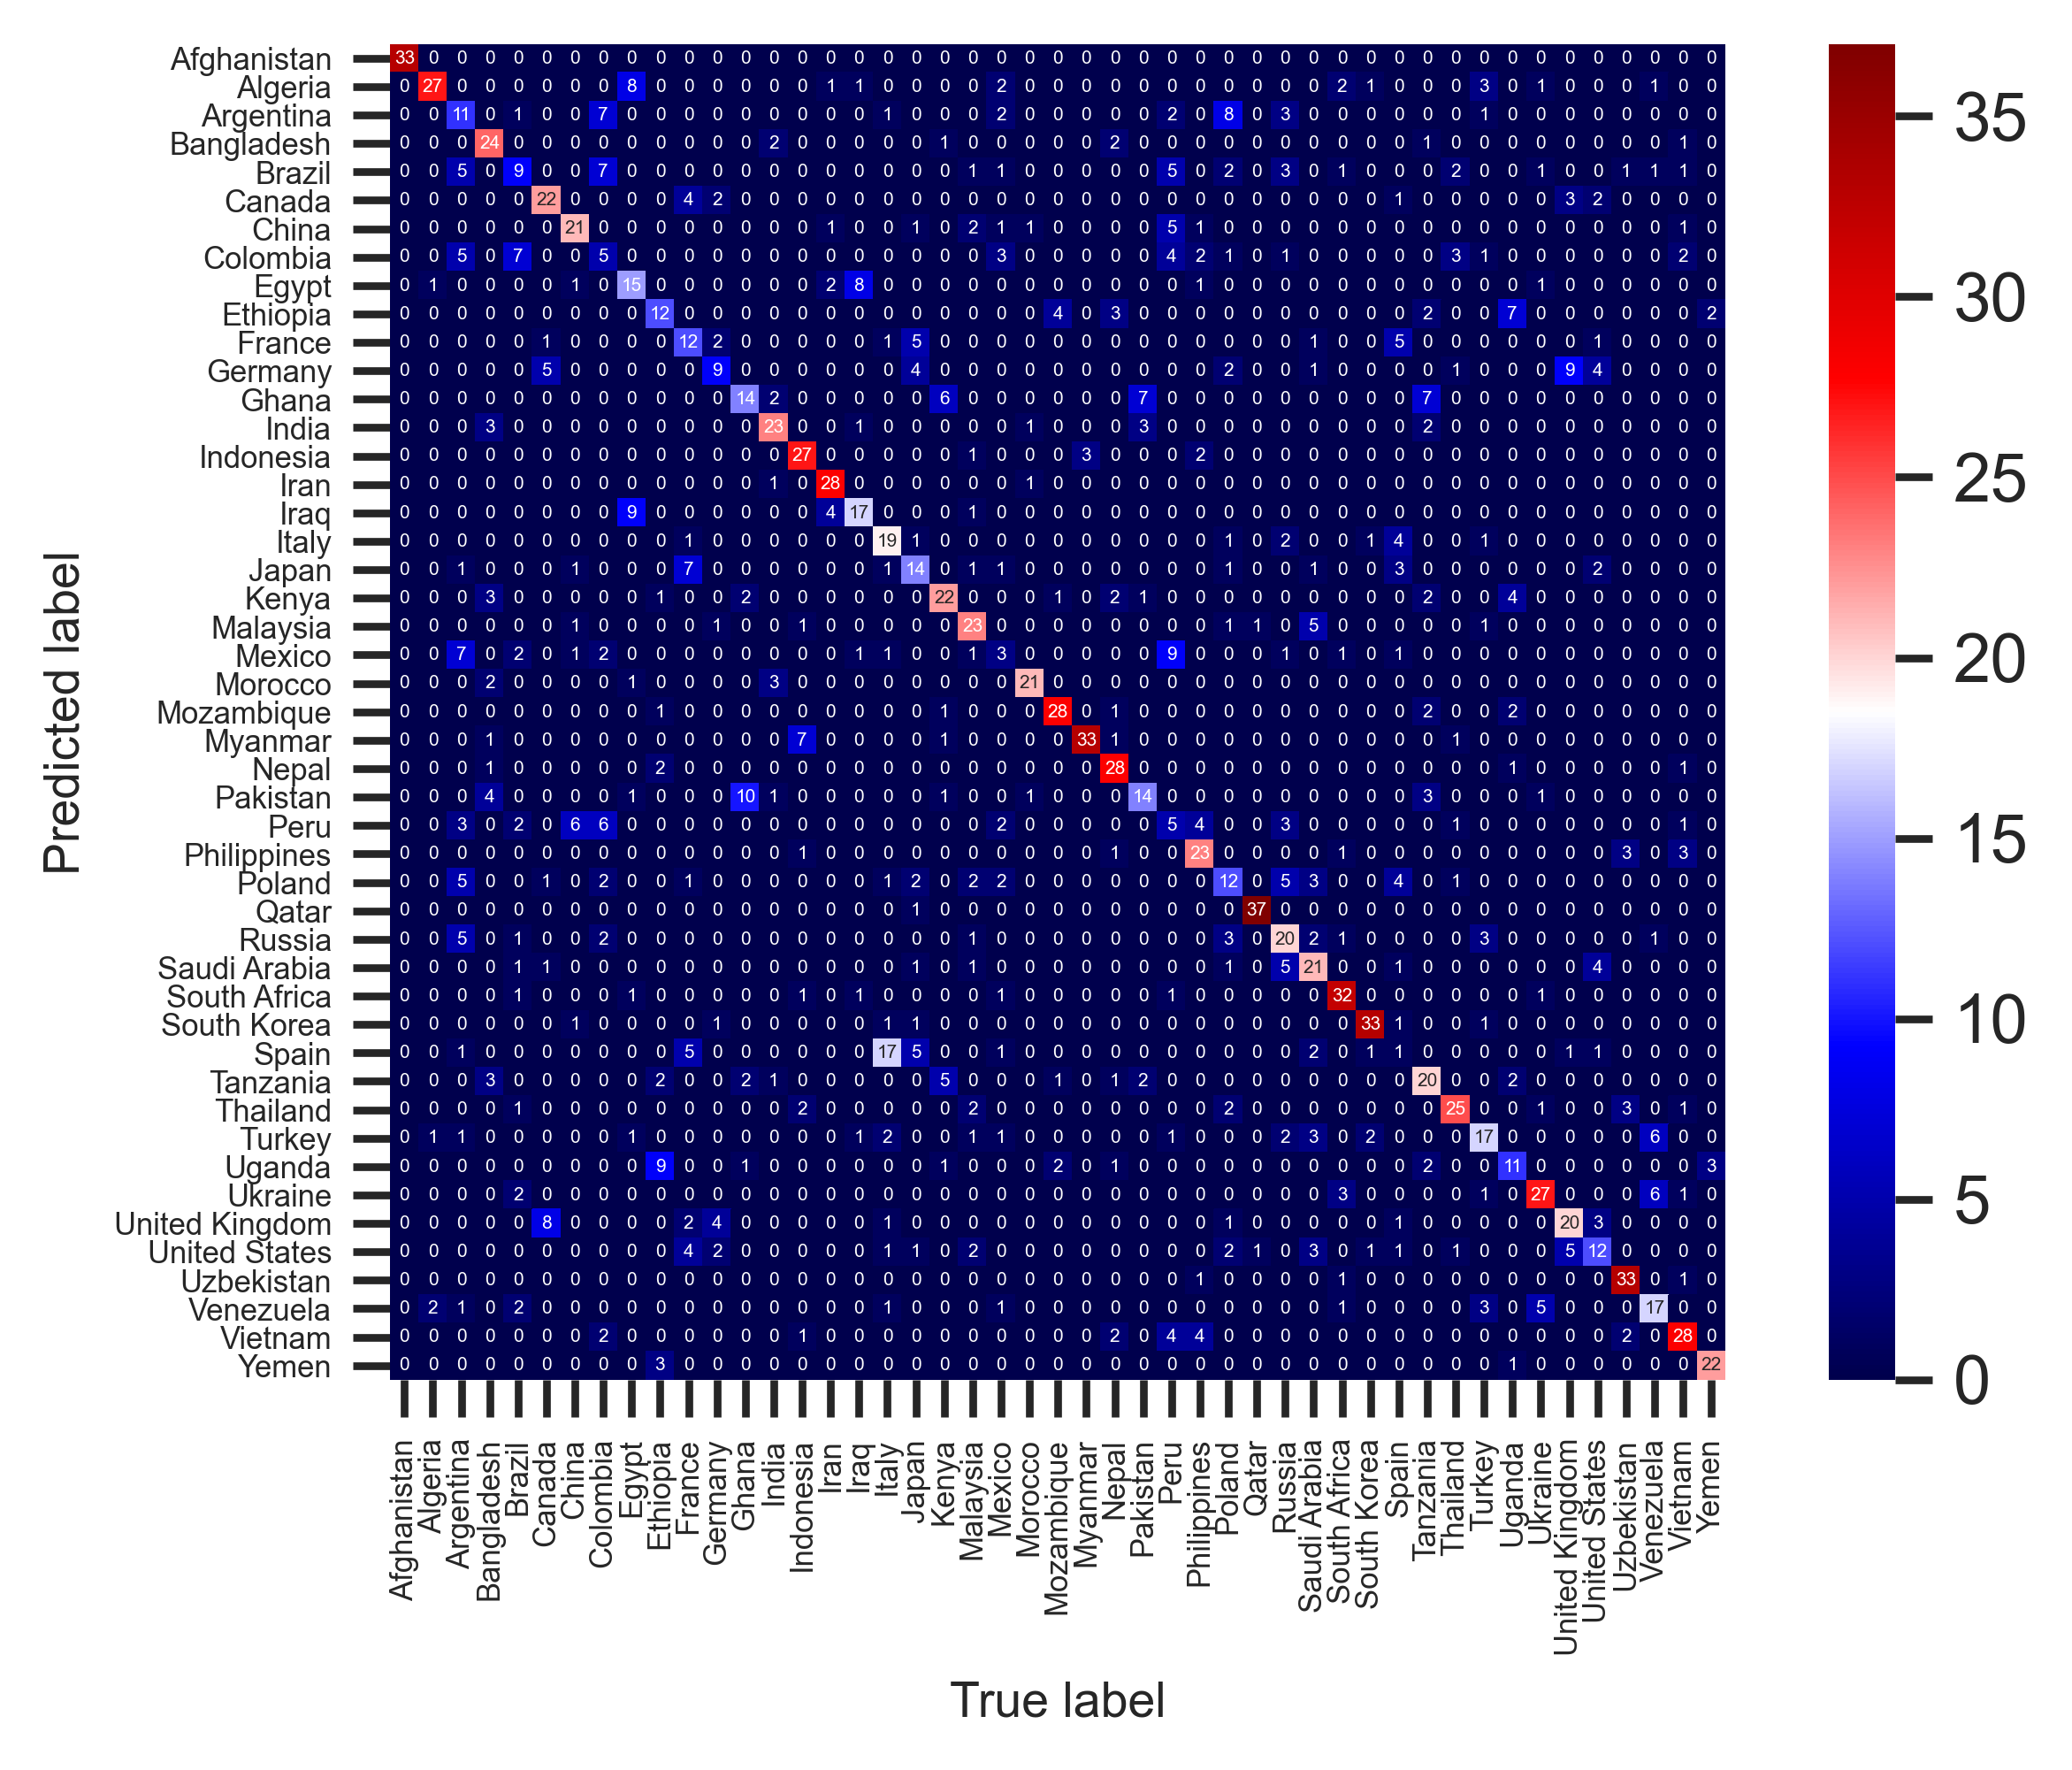

the accuracy for this model is  56.53495440729483


In [365]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
matplotlib.rcParams['figure.dpi']= 500
rf_cm=confusion_matrix(y_test,prediction_rf)

ax = sns.heatmap(rf_cm, square=True, annot=True, fmt='d', cbar=True,
                     xticklabels=countries,
                     yticklabels=countries, cmap="seismic", annot_kws={"size":3})

plt.ylim(47, 0)

cbar = ax.collections[0].colorbar
ax.tick_params(axis='both', which='major', labelsize=5)


plt.xlabel('True label', fontsize=8)
plt.ylabel('Predicted label', fontsize=8)
plt.show()
accuracy = metrics.accuracy_score(y_test, prediction_rf)
print("the accuracy for this model is ", accuracy*100)

a 57% accuracy for such model is pretty good!

# SVM

In [366]:
from sklearn.svm import SVC
svm=SVC(random_state=1,probability=True)
svm.fit(x_train,y_train)
svm_prediction=svm.predict(x_test)

In [367]:
svm.predict([x_test[0]])[0]

3

In [368]:
x_test[0]

array([0.31198496, 0.3667675 , 0.41372351, 0.7004434 , 0.39569096,
       0.65530044])

In [369]:
h = svm.predict_proba([x_test[55]])
h = np.array(h)
h = np.transpose(h)
max(h)

array([0.42797225])

In [370]:
results = svm.predict_proba(x_test)[0]

# gets a dictionary of {'class_name': probability}
prob_per_class_dictionary = dict(zip(svm.classes_, results))

# gets a list of ['most_probable_class', 'second_most_probable_class', ..., 'least_class']
results_ordered_by_probability = map(lambda x: x[0], sorted(zip(svm.classes_, results), key=lambda x: x[1], reverse=True))


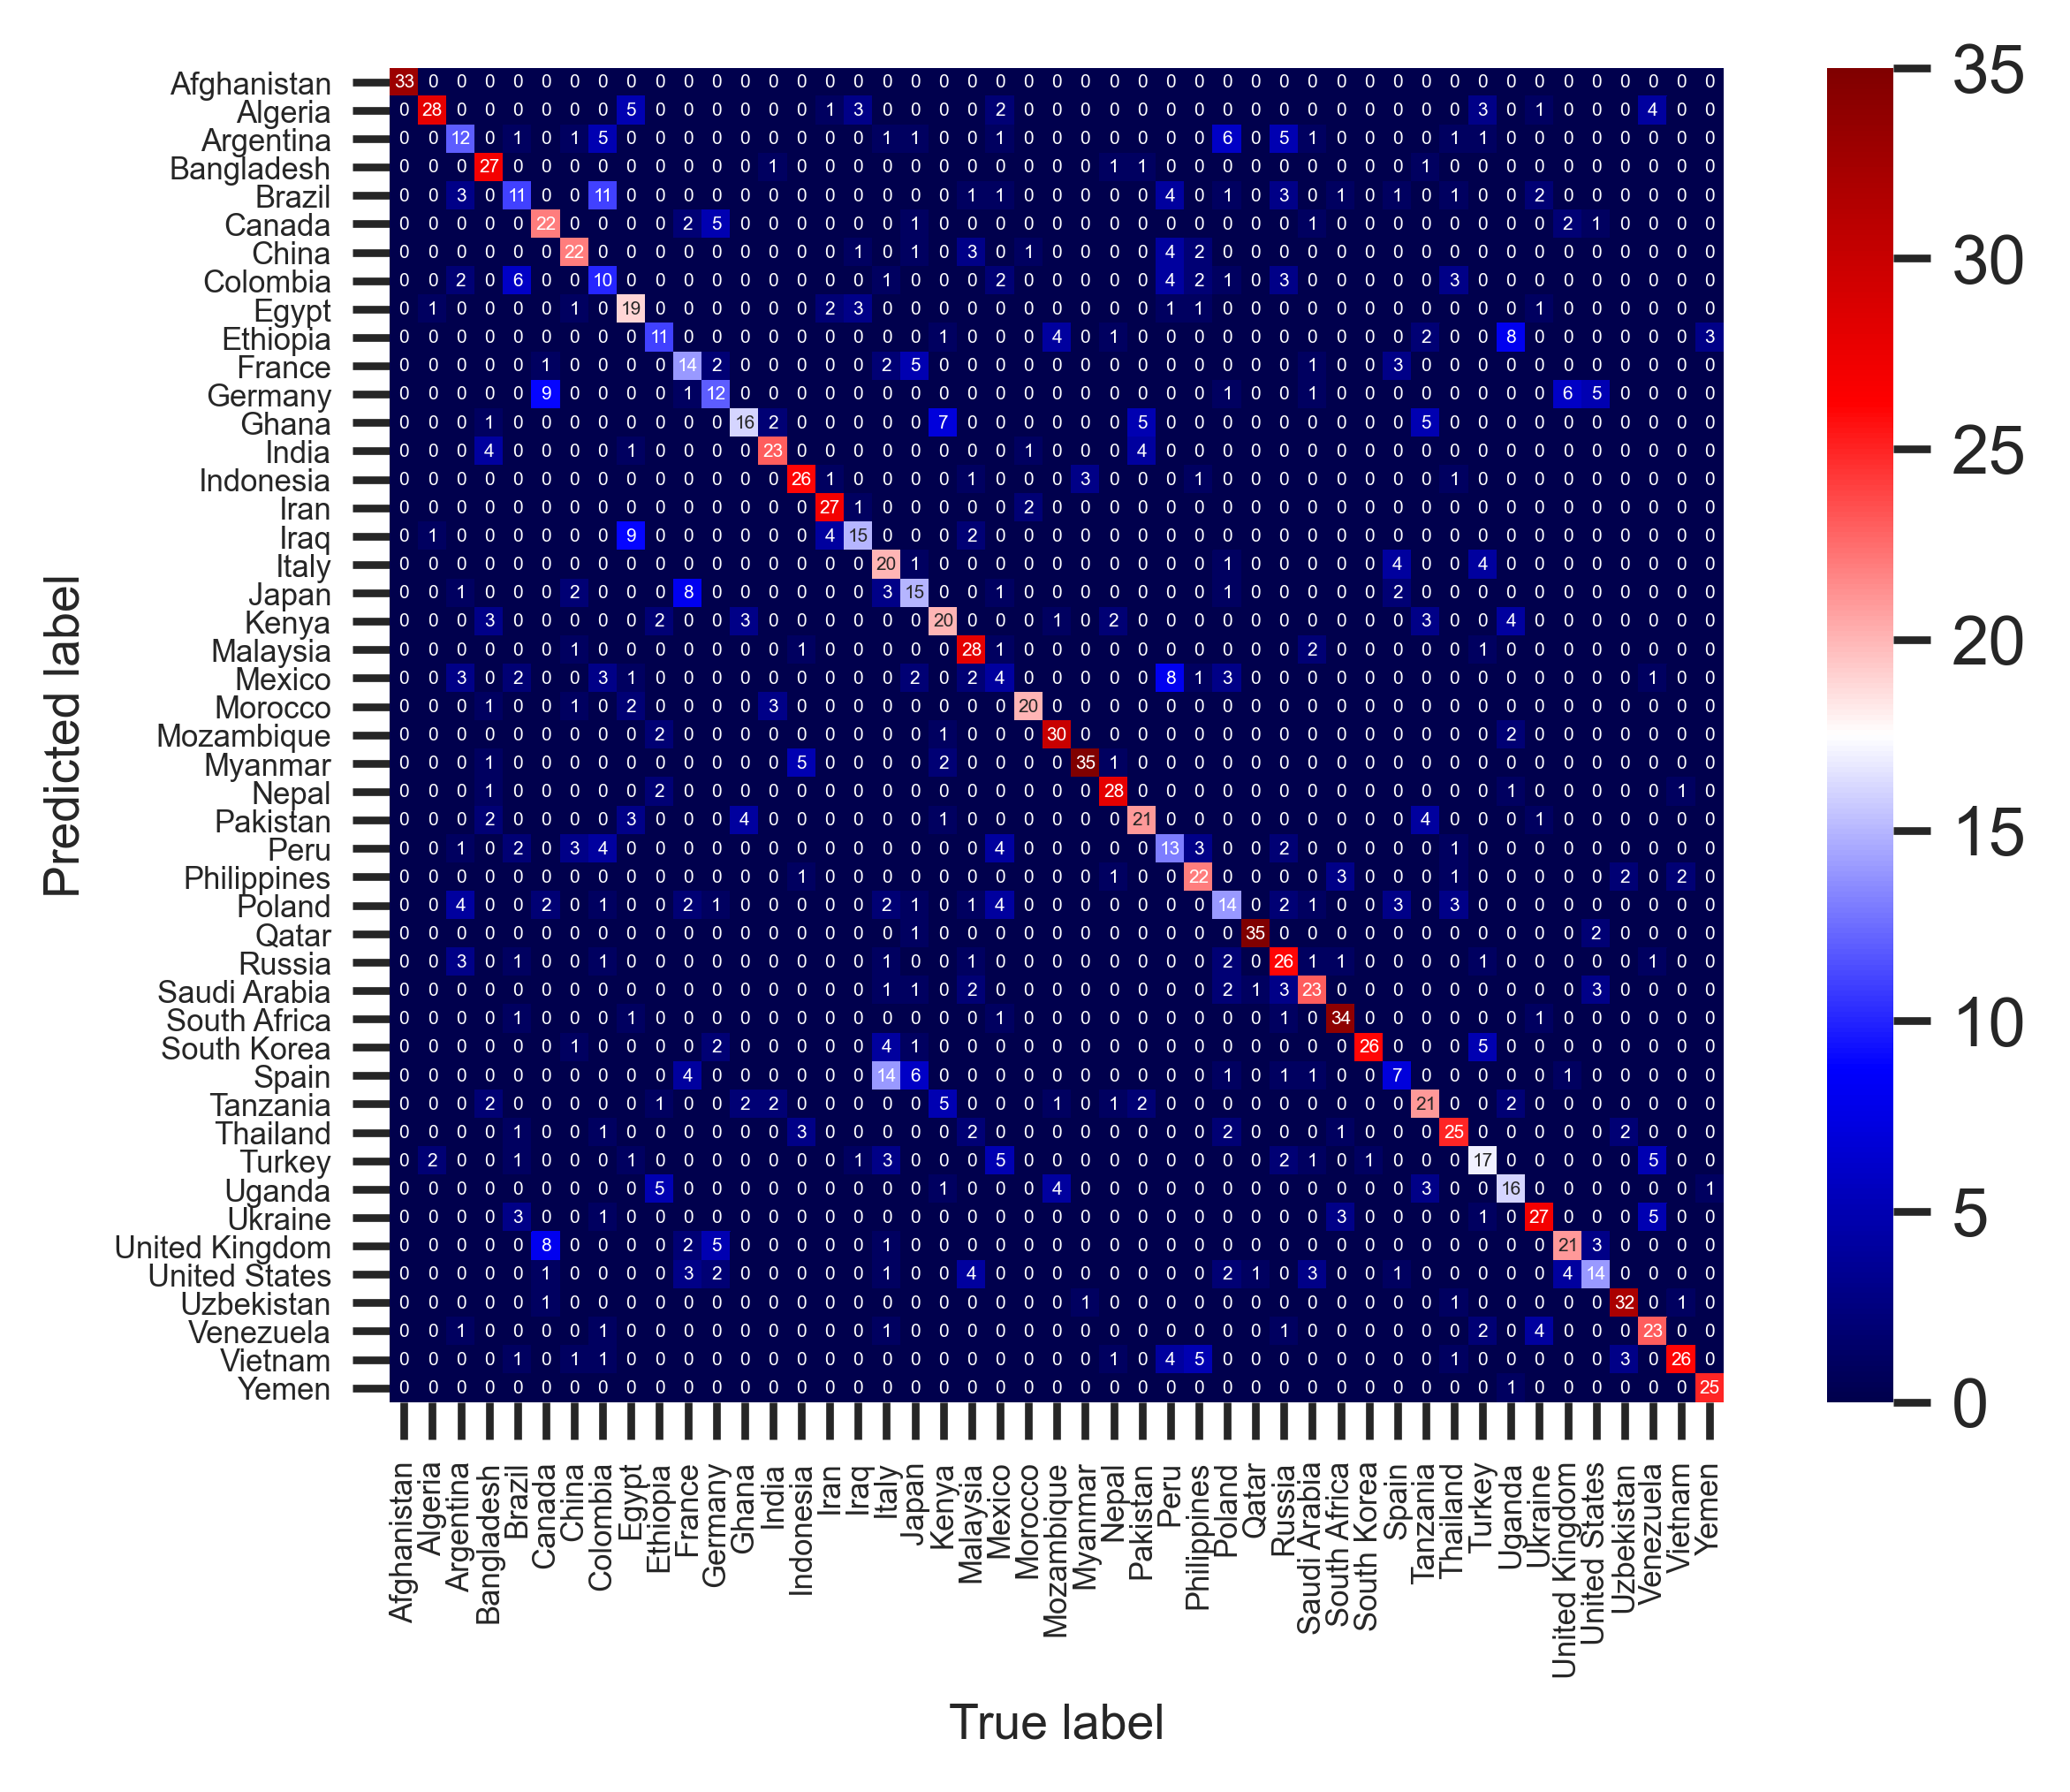

the accuracy for SVM is:  60.54711246200608


In [371]:
from sklearn import metrics
svm_cm=confusion_matrix(y_test,svm_prediction)


ax = sns.heatmap(svm_cm, square=True, annot=True, fmt='d', cbar=True,
                     xticklabels=countries,
                     yticklabels=countries, cmap="seismic", annot_kws={"size":3})

plt.ylim(47, 0)

cbar = ax.collections[0].colorbar
ax.tick_params(axis='both', which='major', labelsize=5)

plt.xlabel('True label', fontsize=8)
plt.ylabel('Predicted label', fontsize=8)
plt.show()
accuracy = metrics.accuracy_score(y_test, svm_prediction)
print("the accuracy for SVM is: ",accuracy*100)


# KNN

In [372]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =13) # n_neighbors = k
knn.fit(x_train,y_train)
knn_prediction = knn.predict(x_test)

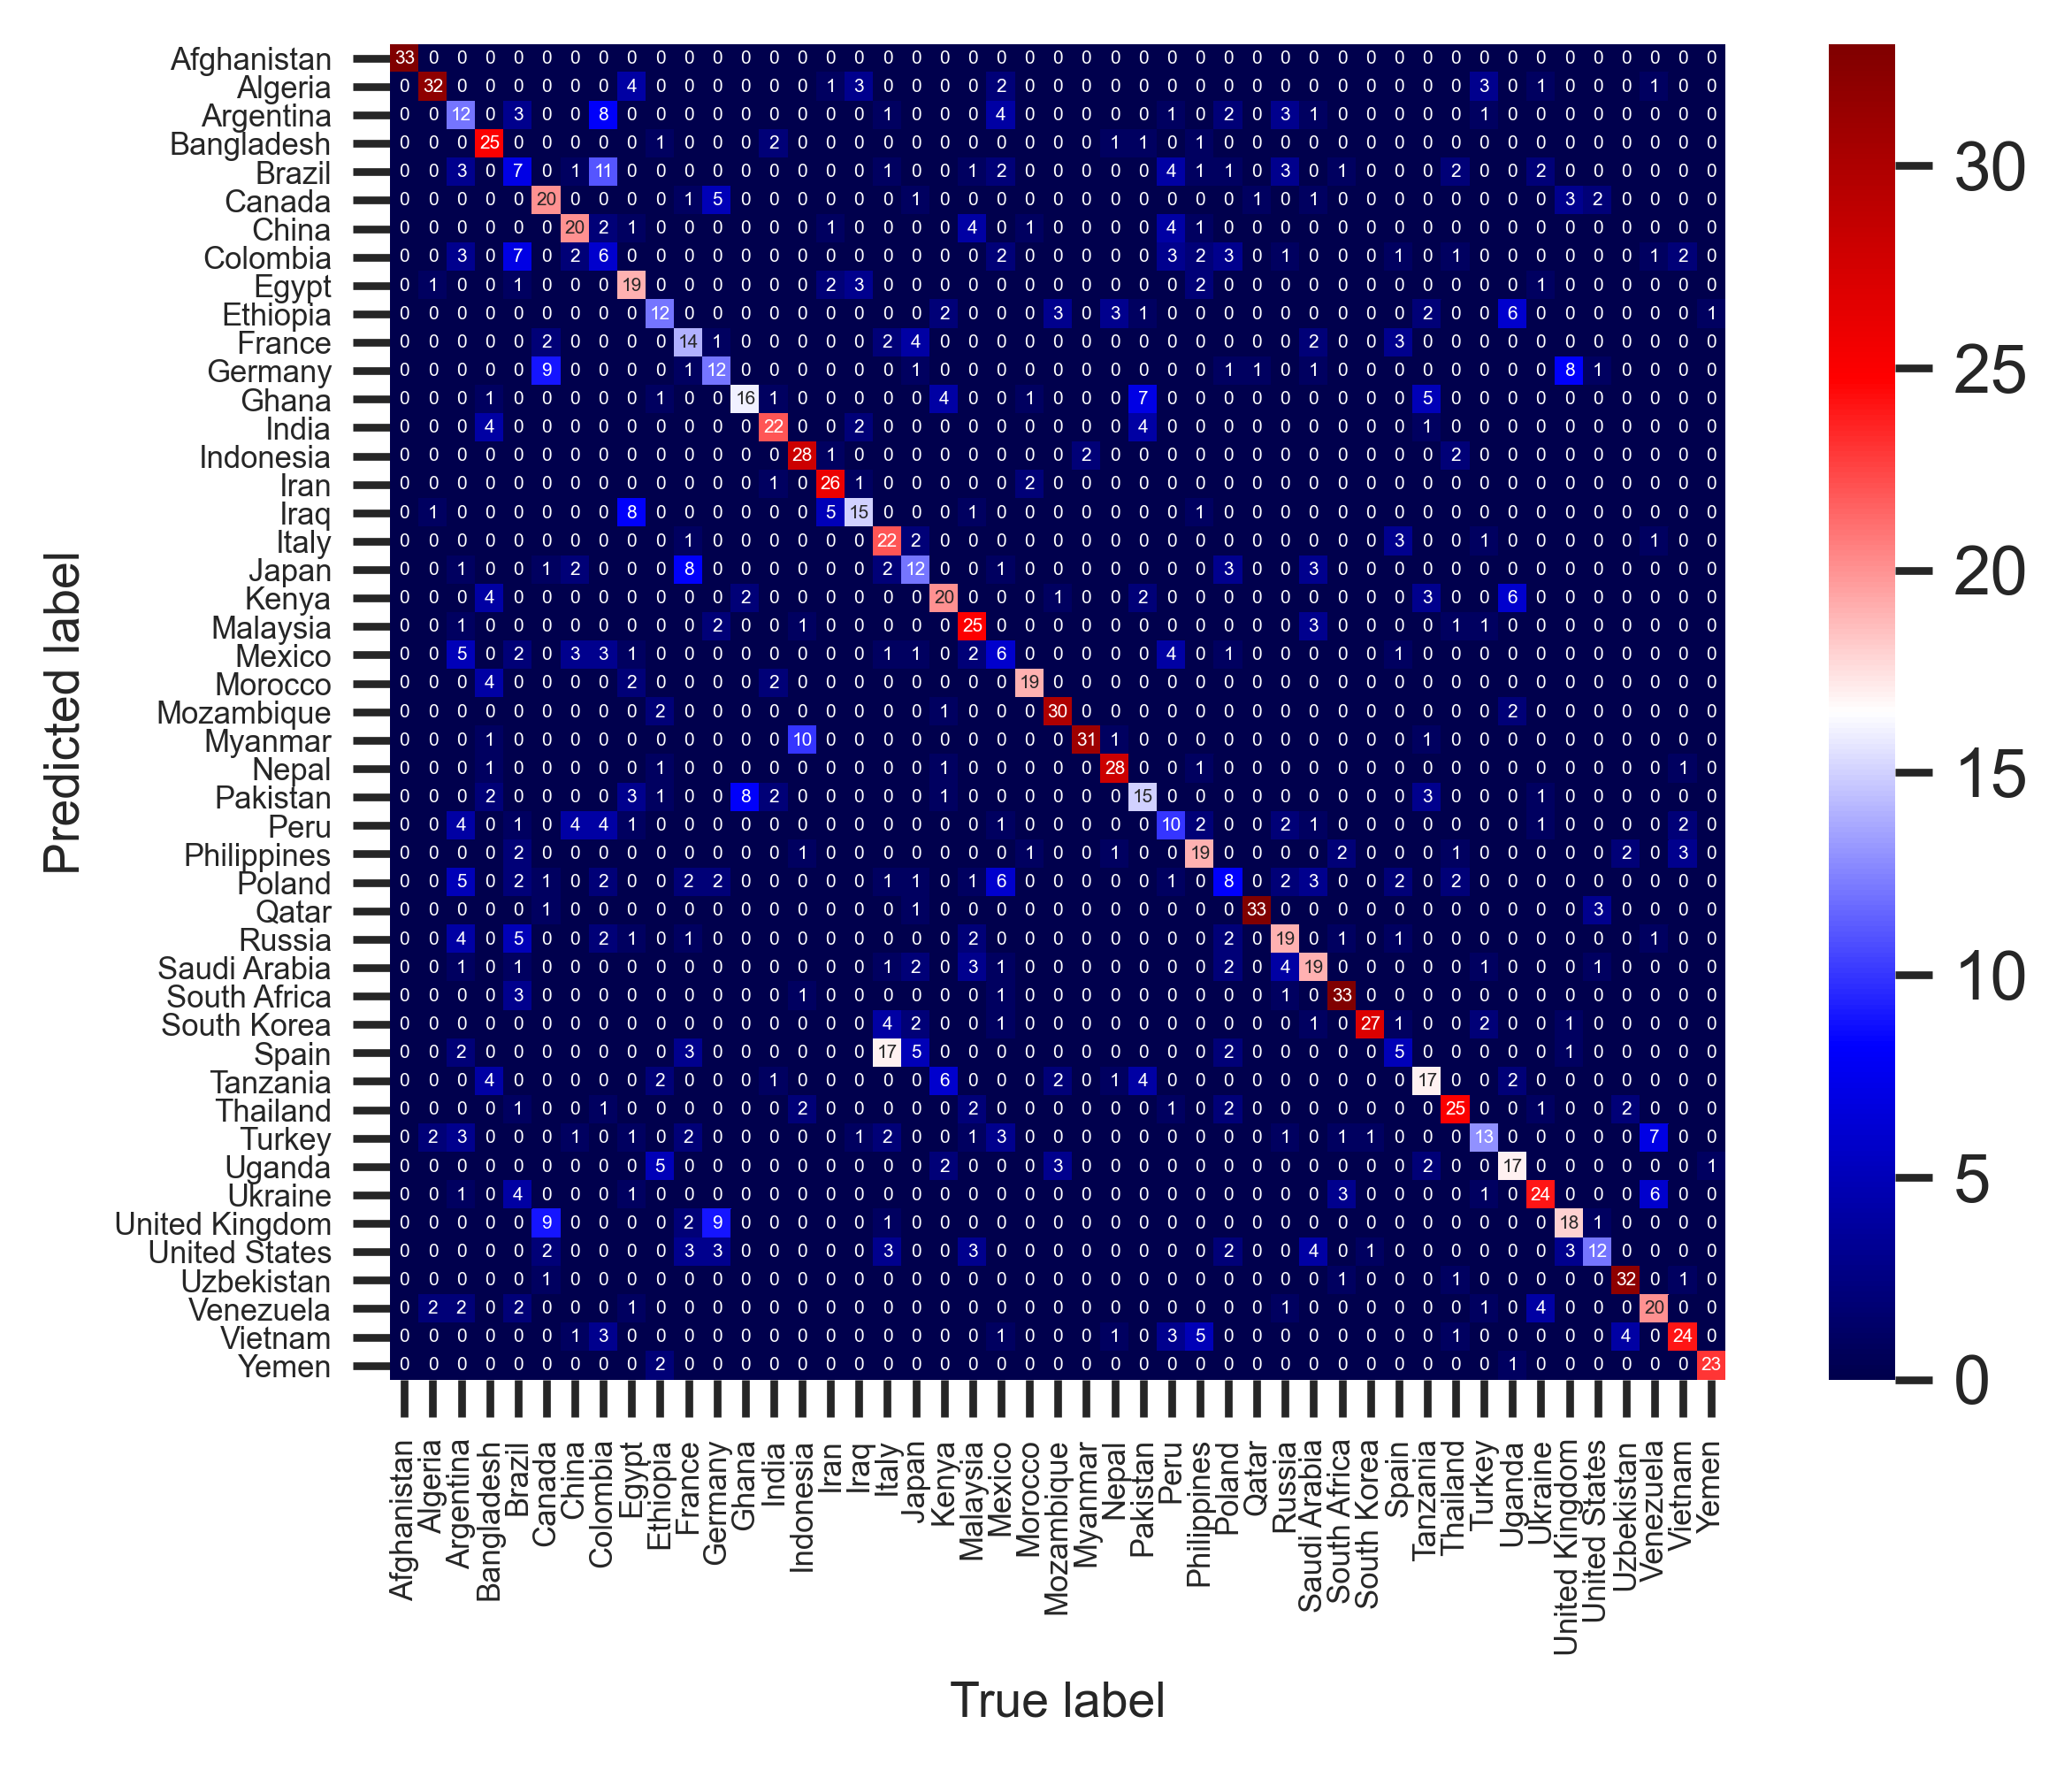

the accuracy for this model is:  56.23100303951368


In [373]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
cm_knn=confusion_matrix(y_test,knn_prediction)
ax = sns.heatmap(cm_knn, square=True, annot=True, fmt='d', cbar=True,
                     xticklabels=countries,
                     yticklabels=countries, cmap="seismic", annot_kws={"size":3})

plt.ylim(47, 0)

cbar = ax.collections[0].colorbar
ax.tick_params(axis='both', which='major', labelsize=5)

plt.xlabel('True label', fontsize=8)
plt.ylabel('Predicted label', fontsize=8)
plt.show()
accuracy = metrics.accuracy_score(y_test, knn_prediction)
print("the accuracy for this model is: ",accuracy*100)


# interface

In [374]:
import tkinter as tk
from tkinter import simpledialog

In [375]:
class svmclassifier:
    
    #def __init__(self):
        
    
    def mainscreen(self):    
        self.window = tk.Tk()
        self.corrpt = tk.IntVar()
        self.GDP = tk.IntVar()
        self.socialsupp = tk.IntVar()
        self.foc = tk.IntVar()
        self.genros = tk.IntVar()
        self.health = tk.IntVar()
        self.window.title("country pridictor")
        
        
        corruption = simpledialog.askinteger("input", 'how corrupt do you feel you country is on a scale from 1 to 10',parent = self.window)/10
        GDP = simpledialog.askinteger("input", 'how wealthy do you think your country is on a scale from 1 to 10',parent = self.window)/10
        sociols = simpledialog.askinteger("input", "how strong is social support in you country is on a scale from 1 to 10",parent = self.window)/10
        freedomoc = simpledialog.askinteger("input", "how free is choice in your country on a scale from 1 to 10",parent = self.window)/10
        generous = simpledialog.askinteger("input", 'how generous are people from your country is on a scale from 1 to 10',parent = self.window)/10
        helth = simpledialog.askinteger("input", 'how healthy are people in your country is on a scale from 1 to 10',parent = self.window)/105
        
        prediction = clf.predict([[GDP,sociols,helth,freedomoc,generous,corruption]])      
        
        h = clf.predict_proba([[GDP,sociols,helth,freedomoc,generous,corruption]])
        h = np.array(h)
        h = np.transpose(h)
        h1 = max(h)
        
        #predictiontxt = tk.Text(self.window)
        #predictiontxt.insert(INSERT,"with {prob} confidence you are from {country}".format(prob =h, country = prediction[0] ))
        
        print("with {prob}% confidence you are from {country}".format(prob =100*h1[0], country = y[prediction[0]] ))

        
        self.window.destroy()

        self.window.mainloop()

In [376]:
w = svmclassifier()
w.mainscreen()

with 60.72641599479458% confidence you are from France


# discussion and limitations

it is clear that there are many limitations to this classifier, first and most important is that it relies on the subjective opinions of people that see things within a local scale while the data is put based on a global scale, also the method of the generation of the data is a bit questionable as it does not rely directly on survies but rather on indices, it is hard for an inde alone to decide alot of varying factors for a country, espicially that the index does not come with a corresponding variance with it, missing around with the variance of the data and choosong a more well educated value would change the results of the classifier to be drastically better in real life testing